In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_NE_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,NaN,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,NaN
2,0.0262,NaN,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,NaN,NaN,NaN,0.0164,0.0095,0.0078
3,NaN,NaN,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,NaN,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,NaN,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,NaN,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,NaN
206,0.0303,0.0353,0.0490,0.0608,0.0167,NaN,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	20
float64		column 2	20
float64		column 3	20
float64		column 4	20
float64		column 5	20
float64		column 6	20
float64		column 7	0
float64		column 8	20
float64		column 9	0
float64		column 10	20
float64		column 11	20
float64		column 12	20
float64		column 13	40
float64		column 14	0
float64		column 15	20
float64		column 16	40
float64		column 17	40
float64		column 18	40
float64		column 19	20
float64		column 20	40
float64		column 21	20
float64		column 22	20
float64		column 23	20
float64		column 30	0
float64		column 25	20
float64		column 26	20
float64		column 27	20
float64		column 28	20
float64		column 29	20
float64		column 30	0
float64		column 31	20
float64		column 32	0
float64		column 33	0
float64		column 34	0
float64		column 35	40
float64		column 36	20
float64		column 37	40
float64		column 38	40
float64		column 39	40
float64		column 40	20
float64		column 41	20
float64		column 42	40
float64		column 43	0
float64		column 44	0
float64		colu

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,208.000000,188.000000,208.000000,188.000000,...,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,208.000000,208.000000,168.000000
mean,0.029280,0.037244,0.042486,0.051598,0.070698,0.102591,0.121747,0.130653,0.178003,0.199856,...,0.015615,0.013665,0.010624,0.010984,0.009342,0.008019,0.007739,0.007949,0.007941,0.006360
std,0.022677,0.030282,0.033366,0.045116,0.049782,0.057426,0.061788,0.074876,0.118387,0.124485,...,0.011974,0.009764,0.006934,0.007305,0.007133,0.005631,0.005608,0.006470,0.006181,0.004147
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.009800,0.007500,0.011300,...,0.000000,0.001300,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013475,0.015275,0.019475,0.023900,0.035775,0.067875,0.080900,0.081600,0.097025,0.109600,...,0.008050,0.007275,0.005075,0.005500,0.004300,0.004350,0.003700,0.003600,0.003675,0.003275
50%,0.023200,0.030900,0.034400,0.043000,0.061500,0.091350,0.106950,0.111800,0.152250,0.180700,...,0.013700,0.011800,0.009700,0.009400,0.007600,0.006800,0.006100,0.005800,0.006400,0.005500
75%,0.035550,0.047250,0.055875,0.062700,0.095175,0.126700,0.154000,0.168550,0.233425,0.257750,...,0.020225,0.016900,0.014750,0.014250,0.012025,0.010100,0.010150,0.010350,0.010325,0.008125
max,0.137100,0.163200,0.199700,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.660900,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.023100


<AxesSubplot:>

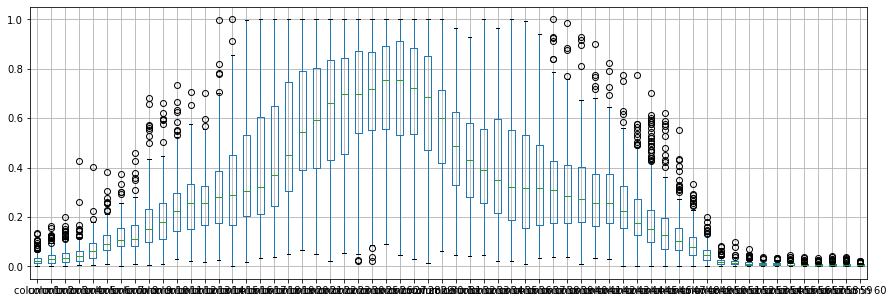

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.029280
column 2       0.037244
column 3       0.042486
column 4       0.051598
column 5       0.070698
column 6       0.102591
column 7       0.121747
column 8       0.130653
column 9       0.178003
column 10      0.199856
column 11      0.237321
column 12      0.259227
column 13      0.267495
column 14      0.296568
column 15      0.320656
column 16      0.371025
column 17      0.408164
column 18      0.445233
column 19      0.515066
column 20      0.564220
column 21      0.600827
column 22      0.626191
column 23      0.648889
column 30      0.672654
column 25      0.676180
column 26      0.702488
column 27      0.700645
column 28      0.689183
column 29      0.651473
column 30.1    0.571865
column 31      0.498930
column 32      0.439040
column 33      0.417220
column 34      0.403233
column 35      0.387379
column 36      0.369510
column 37      0.364139
column 38      0.331049
column 39      0.318804
column 40      0.303731
column 41      0.288784
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.685957,0.468014,0.524624,0.338964,0.200863,0.245075,0.507238,0.361149,0.382710,...,0.267150,0.377795,0.343992,0.371630,0.324728,0.222505,0.313106,0.388262,0.385523,0.443077
column 2,0.685957,1.000000,0.718434,0.438845,0.270126,0.295741,0.313702,0.509187,0.361678,0.287782,...,0.355317,0.393132,0.292937,0.371304,0.405440,0.350376,0.265678,0.397811,0.350372,0.415612
column 3,0.468014,0.718434,1.000000,0.678274,0.318844,0.310857,0.147161,0.323538,0.320587,0.244161,...,0.255230,0.303532,0.264491,0.407395,0.326375,0.332843,0.397630,0.366880,0.406477,0.387403
column 4,0.524624,0.438845,0.678274,1.000000,0.692235,0.359147,0.234969,0.372440,0.235981,0.220495,...,0.088775,0.347395,0.353761,0.338601,0.273297,0.190240,0.279761,0.317469,0.367082,0.417581
column 5,0.338964,0.270126,0.318844,0.692235,1.000000,0.557964,0.338427,0.274793,0.172651,0.215880,...,0.072378,0.263531,0.285831,0.141389,0.137010,0.067838,0.042003,0.094621,0.227253,0.252634
column 6,0.200863,0.295741,0.310857,0.359147,0.557964,1.000000,0.701495,0.482261,0.335864,0.316301,...,0.093453,0.231101,0.113376,0.157624,0.080556,0.133304,0.157424,0.191175,0.189337,0.079499
column 7,0.245075,0.313702,0.147161,0.234969,0.338427,0.701495,1.000000,0.681296,0.470580,0.400284,...,0.176487,0.156432,0.085065,0.140382,0.185948,0.157291,0.157383,0.242646,0.183578,0.150378
column 8,0.507238,0.509187,0.323538,0.372440,0.274793,0.482261,0.681296,1.000000,0.720294,0.582673,...,0.240683,0.298973,0.182561,0.134029,0.170622,0.179833,0.184331,0.231174,0.107998,0.245626
column 9,0.361149,0.361678,0.320587,0.235981,0.172651,0.335864,0.470580,0.720294,1.000000,0.886223,...,0.168280,0.207009,0.138991,0.201728,0.163191,0.210431,0.147070,0.231745,0.097293,0.190459
column 10,0.382710,0.287782,0.244161,0.220495,0.215880,0.316301,0.400284,0.582673,0.886223,1.000000,...,0.088796,0.112568,0.052867,0.126102,0.125504,0.097159,0.102241,0.190577,0.054030,0.170184


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+28,60+28+28,60+28+28+28,60+28+28,60+28,60], vae_layer = False, seed = 280)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 16.825187389667217
Epoch: 1 , loss: 16.591535494877743
Epoch: 2 , loss: 16.463798669668343
Epoch: 3 , loss: 16.378221951998196
Epoch: 4 , loss: 16.319901393010067
Epoch: 5 , loss: 16.235382887033317
Epoch: 6 , loss: 16.108540534973145
Epoch: 7 , loss: 16.007192538334774
Epoch: 8 , loss: 15.931613335242638
Epoch: 9 , loss: 15.786638259887695
Epoch: 10 , loss: 15.6214599609375
Epoch: 11 , loss: 15.376315850477953
Epoch: 12 , loss: 15.073429034306454
Epoch: 13 , loss: 14.616695990929237
Epoch: 14 , loss: 13.868297650263859
Epoch: 15 , loss: 12.72843258197491
Epoch: 16 , loss: 11.49175526545598
Epoch: 17 , loss: 10.44048257974478
Epoch: 18 , loss: 9.750906577477089
Epoch: 19 , loss: 9.330142974853516
Epoch: 20 , loss: 8.981665317828838
Epoch: 21 , loss: 8.79825184895442
Epoch: 22 , loss: 8.525730206416203
Epoch: 23 , loss: 8.622155079474815
Epoch: 24 , loss: 8.338951404278095
Epoch: 25 , loss: 8.4027771582

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.066400
column 2       0.057500
column 3       0.045225
column 4       0.037200
column 5       0.045800
column 6       0.077100
column 7       0.077100
column 8       0.113000
column 9       0.235300
column 10      0.183800
column 11      0.286900
column 12      0.412900
column 13      0.364700
column 14      0.198400
column 15      0.284000
column 16      0.321410
column 17      0.583700
column 18      0.679200
column 19      0.608600
column 20      0.485800
column 21      0.507181
column 22      0.201300
column 23      0.208200
column 30      0.168600
column 25      0.248400
column 26      0.273600
column 27      0.298400
column 28      0.465500
column 29      0.699000
column 30.1    0.747400
column 31      0.795600
column 32      0.798100
column 33      0.671500
column 34      0.694200
column 35      0.744000
column 36      0.816900
column 37      0.891200
column 38      1.000000
column 39      0.875300
column 40      0.258187
column 41      0.680300
column 42      0

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,-0.005805,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,-0.000577
2,0.000000,-0.015106,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,-0.00804,-0.015185,-0.019192,0.0,0.0,0.000000
3,0.010565,0.003979,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.011298,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.000000,0.000000,0.0,0.0,0.0,-0.061813,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,-0.006059,0.00000,0.000000,0.000000,0.0,0.0,0.000000
204,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
205,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.001030
206,0.000000,0.000000,0.0,0.0,0.0,-0.052080,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

8.025412931581037

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.18009929703783698

In [19]:
new_df.iloc[66,:]

column 1       0.026500
column 2       0.044000
column 3       0.013700
column 4       0.008400
column 5       0.030500
column 6       0.043800
column 7       0.034100
column 8       0.138676
column 9       0.084400
column 10      0.211263
column 11      0.032700
column 12      0.206000
column 13      0.298205
column 14      0.106500
column 15      0.145700
column 16      0.390808
column 17      0.207000
column 18      0.452823
column 19      0.107800
column 20      0.582132
column 21      0.620631
column 22      0.068900
column 23      0.206000
column 30      0.238400
column 25      0.090400
column 26      0.227800
column 27      0.587200
column 28      0.845700
column 29      0.678512
column 30.1    0.767900
column 31      0.805500
column 32      0.626000
column 33      0.654500
column 34      0.874700
column 35      0.988500
column 36      0.934800
column 37      0.696000
column 38      0.340367
column 39      0.587200
column 40      0.666300
column 41      0.565100
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.020000,0.037100,0.0428,0.0207,0.0954,0.098600,0.1539,0.1601,0.3109,0.211100,...,0.017395,0.0027,0.0065,0.015900,0.00720,0.016700,0.018000,0.0084,0.0090,0.003200
1,0.045300,0.052300,0.0843,0.0689,0.1183,0.258300,0.2156,0.3481,0.3337,0.287200,...,0.012500,0.0084,0.0089,0.004800,0.00940,0.019100,0.014000,0.0049,0.0052,0.003823
2,0.026200,0.043094,0.1099,0.1083,0.0974,0.228000,0.2431,0.3771,0.5598,0.619400,...,0.003300,0.0232,0.0166,0.009500,0.00996,0.009215,0.012408,0.0164,0.0095,0.007800
3,0.020565,0.021079,0.0623,0.0205,0.0205,0.036800,0.1098,0.1276,0.0598,0.115102,...,0.024100,0.0121,0.0036,0.015000,0.00850,0.007300,0.005000,0.0044,0.0040,0.011700
4,0.076200,0.066600,0.0481,0.0394,0.0590,0.064900,0.1209,0.2467,0.3564,0.445900,...,0.015600,0.0031,0.0054,0.010500,0.01100,0.001500,0.007200,0.0048,0.0107,0.009400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018700,0.034600,0.0168,0.0177,0.0393,0.101187,0.2028,0.1694,0.2328,0.268400,...,0.020300,0.0116,0.0098,0.013841,0.00330,0.010100,0.006500,0.0115,0.0193,0.015700
204,0.032300,0.010100,0.0298,0.0564,0.0760,0.095800,0.0990,0.1018,0.1030,0.215400,...,0.005100,0.0061,0.0093,0.013500,0.00630,0.006300,0.003400,0.0032,0.0062,0.006700
205,0.052200,0.043700,0.0180,0.0292,0.0351,0.117100,0.1257,0.1178,0.1258,0.252900,...,0.015500,0.0160,0.0029,0.005100,0.00620,0.008900,0.014000,0.0138,0.0077,0.004130
206,0.030300,0.035300,0.0490,0.0608,0.0167,0.083320,0.1465,0.1123,0.1945,0.235400,...,0.004200,0.0086,0.0046,0.012600,0.00360,0.003500,0.003400,0.0079,0.0036,0.004800


In [21]:
imputations[-1].to_excel("Sonar_NE_10(imp).xlsx", index=False, header=False)